# HeartGuard: Unveiling Insights and Predicting Heart Health with Advanced Analytics

**Introduction:**

In the intricate tapestry of human health, the ominous specter of heart disease looms large, claiming lives and exacting a substantial toll on public well-being. As the United States grapples with the pervasive impact of heart-related ailments, a beacon of hope emerges from the labyrinth of data – a comprehensive dataset encapsulating the health profiles of over 400,000 adults, meticulously curated by the Centers for Disease Control and Prevention (CDC).

This dataset, a treasure trove of information from the annual Behavioral Risk Factor Surveillance System (BRFSS) survey, serves as the foundation for our expedition into the realm of predictive healthcare analytics. The goal is audacious yet profound: to harness the power of machine learning and artificial intelligence in unraveling the patterns that foretell the presence of heart disease, offering healthcare professionals a preemptive strike against its insidious onset.

In this data-driven odyssey, we embark on a journey of Exploration, Discovery, and Application (EDA). The dataset, a distilled essence of 2022 CDC survey data, harbors 40 key variables, each a potential harbinger of heart health. The variables, ranging from blood pressure and cholesterol levels to lifestyle choices and chronic conditions, pave the way for an exhaustive exploration of the factors influencing heart disease. 

Beyond the traditional realms of Exploratory Data Analysis (EDA), we delve into the alchemy of Feature Engineering, sculpting the raw data into predictive gold. Our toolkit encompasses an ensemble of machine learning models – the venerable Logistic Regression, the formidable XGBoost, the intricate neural networks of Artificial Neural Networks (ANN), and the decision-making prowess of Decision Trees. 

But the journey does not conclude with model building. Our quest culminates in the selection of the most adept model, a beacon of predictive accuracy amidst the sea of possibilities. The chosen model, our linchpin, becomes the nucleus of a revolutionary application. Harnessing the Flask framework, we birth a web application – HeartGuard.

HeartGuard, a sentinel against heart disease, transcends the realms of mere prediction. Designed for the guardians of health, nurses, and medical practitioners, this application crystallizes our endeavors into a practical, time-saving tool. Empowering the healthcare community with rapid, data-driven insights, HeartGuard not only saves time but emerges as a beacon for early detection – a critical juncture where timely intervention can be the difference between life and its tragic alternative.

In this notebook, we sow the seeds of technological innovation, cultivating a predictive garden where every variable, every model, and every line of code stands as a testament to our commitment to saving lives and preserving precious resources. Welcome to the forefront of predictive healthcare – where algorithms converge with altruism, and data becomes a catalyst for a healthier, heartier tomorrow.

For more context visit: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

- HeartDisease : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).- 
BMI : Body Mass Index (BMI)
- Smoking : Have you smoked at least 100 cigarettes in your entire life? ( The answer Yes or No ).
- AlcoholDrinking : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week.
- Stroke : (Ever told) (you had) a stroke?
- PhysicalHealth : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
- MentalHealth : Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
- DiffWalking : Do you have serious difficulty walking or climbing stairs?
- Sex : Are you male or female?
- AgeCategory: Fourteen-level age category.
- Race : Imputed race/ethnicity value.
- Diabetic : (Ever told) (you had) diabetes?
- PhysicalActivity : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
- GenHealth : Would you say that in general your health is...
- SleepTime : On average, how many hours of sleep do you get in a 24-hour period?
- Asthma : (Ever told) (you had) asthma?
- KidneyDisease : Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer : (Ever told) (you had) skin cancer?.had) skin cancer?

### Importing pack

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

# Model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Additional utilities
from tensorflow.keras.utils import to_categorical
# Callbacks for training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# Visualizing model architecture
from tensorflow.keras.utils import plot_model

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [60]:
# loading in the data
data = pd.read_csv('heart_2020_cleaned.csv')
data.head(20)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


### Exploratory Data Analysis

- I am basically cleaning the data but handling missing data, outliners and duplicates.
- Visualization would help us have an understanding of what to expect with the data, so how do this features relate to having a heart disease or not. 

In [4]:
data.shape

(319795, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

###### Base on the data info there are not missing data.

In [6]:
data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


###### Already I can see the max values look very interesting, so i have to check for outliners for this data.

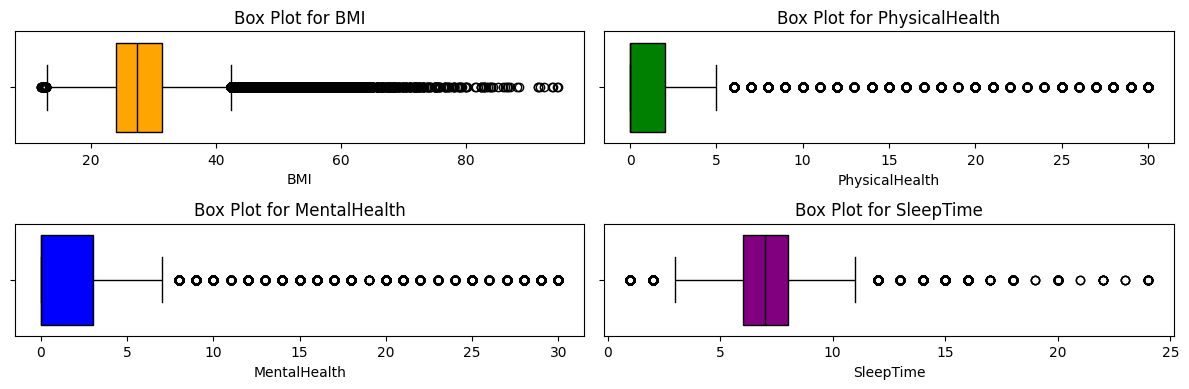

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))

#BMI
sns.boxplot(x= 'BMI', 
            data= data, 
            ax= axes[0,0],
            color='black', boxprops=dict(facecolor='orange')
           )
axes[0,0].set_title('Box Plot for BMI')

#PhysicalHealth
sns.boxplot(x= 'PhysicalHealth', 
            data= data, 
            ax= axes[0,1],
            color='black', boxprops=dict(facecolor='green')
           )
axes[0,1].set_title('Box Plot for PhysicalHealth')

#MentalHealth
sns.boxplot(x= 'MentalHealth', 
            data= data, 
            ax= axes[1,0],
            color='black', boxprops=dict(facecolor='blue')
           )
axes[1,0].set_title('Box Plot for MentalHealth')

#SleepTime
sns.boxplot(x= 'SleepTime', 
            data= data, 
            ax= axes[1,1],
            color='black', boxprops=dict(facecolor='purple')
           )
axes[1,1].set_title('Box Plot for SleepTime')

plt.tight_layout()
plt.show()


#### Observation.
- For BMI I am a bit sceptical in removing the data there because of it's important according to CDC
- Since physical and mental Health is self reported then I don't think it carries so much weight don't get me wrong and also depending on how many outliers are there I would be removing this.
- Same this for Sleep time, carries more weight but depending on the number of outliers I would be removing them. 

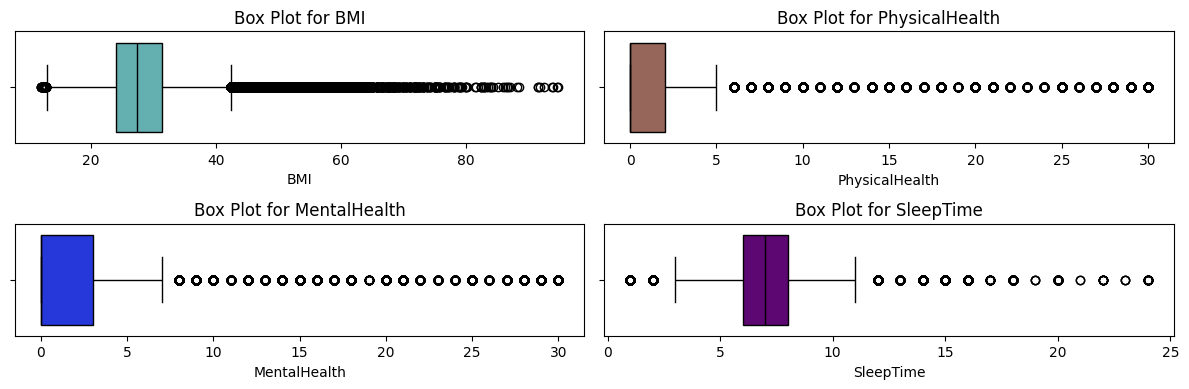

In [8]:
# Using a function. 
def plot_boxplots(data, column_names, nrows=2, ncols=2):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 4))
    
    for i, column in enumerate(column_names):
        row_index = i // ncols
        col_index = i % ncols
        
        # Generate a random face color
        random_face_color = np.random.rand(3,)

        sns.boxplot(x=column, 
                    data=data, 
                    ax=axes[row_index, col_index], 
                    color='black', boxprops=dict(facecolor=random_face_color))
        axes[row_index, col_index].set_title(f'Box Plot for {column}')

    plt.tight_layout()
    plt.show()

# Example usage:
columns_to_plot = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
plot_boxplots(data, columns_to_plot)

In [8]:
# Handling outliers in PhysicalHealth, MentalHealth and SleepTime

# Assuming 'data' is your DataFrame
columns_to_check = ['PhysicalHealth', 'MentalHealth', 'SleepTime']

# Function to identify and count outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    return len(outliers)

# Displaying the number of outliers for each column
for column in columns_to_check:
    num_outliers = count_outliers(data[column])
    total_data_points = len(data)
    print(f"Number of outliers in {column}: {num_outliers} out of {total_data_points} data points")

Number of outliers in PhysicalHealth: 47146 out of 319795 data points
Number of outliers in MentalHealth: 51576 out of 319795 data points
Number of outliers in SleepTime: 4543 out of 319795 data points


###### Since XGBoost, DecisionTrees and RandomForest aren't sensitive to outliers then I would make a seperate training data for them and for my ANN and Logistic regression I would be Using the data without outliers. 

In [9]:
# Assuming 'data' is your DataFrame
columns_to_check = ['PhysicalHealth', 'MentalHealth', 'SleepTime']

# Function to identify and remove outliers
def remove_outliers(df, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep rows where the value is within the bounds
    df_cleaned = data[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_cleaned

# Remove outliers for each specified column
for column in columns_to_check:
    data_clean = remove_outliers(data, column)

# Print the shape of the DataFrame after removing outliers
print(f"DataFrame shape after removing outliers: {data_clean.shape}")

DataFrame shape after removing outliers: (315252, 18)


In [10]:
data_clean.shape, data.shape

((315252, 18), (319795, 18))

In [11]:
data_clean['HeartDisease'].value_counts(normalize= True)*100

HeartDisease
No     91.561989
Yes     8.438011
Name: proportion, dtype: float64

In [12]:
data['HeartDisease'].value_counts(normalize= True)*100

HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64

###### Seeing this has given me second thoughts, the data doesn't have a large difference and also the ratio did not change so for both all models I would be using that data without outliers. 

## Visualization

In [13]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315252 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      315252 non-null  object 
 1   BMI               315252 non-null  float64
 2   Smoking           315252 non-null  object 
 3   AlcoholDrinking   315252 non-null  object 
 4   Stroke            315252 non-null  object 
 5   PhysicalHealth    315252 non-null  float64
 6   MentalHealth      315252 non-null  float64
 7   DiffWalking       315252 non-null  object 
 8   Sex               315252 non-null  object 
 9   AgeCategory       315252 non-null  object 
 10  Race              315252 non-null  object 
 11  Diabetic          315252 non-null  object 
 12  PhysicalActivity  315252 non-null  object 
 13  GenHealth         315252 non-null  object 
 14  SleepTime         315252 non-null  float64
 15  Asthma            315252 non-null  object 
 16  KidneyDisease     315252 

C:\Users\mayuo\AppData\Local\Temp\ipykernel_23096\3937779022.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=feature, data=data, palette="Set2")
C:\Users\mayuo\AppData\Local\Temp\ipykernel_23096\3937779022.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=feature, data=data, palette="Set2")
C:\Users\mayuo\AppData\Local\Temp\ipykernel_23096\3937779022.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_variable, y=feature, data=data, palette="Set2")
C:\Users\mayuo\AppData\Local\Temp\

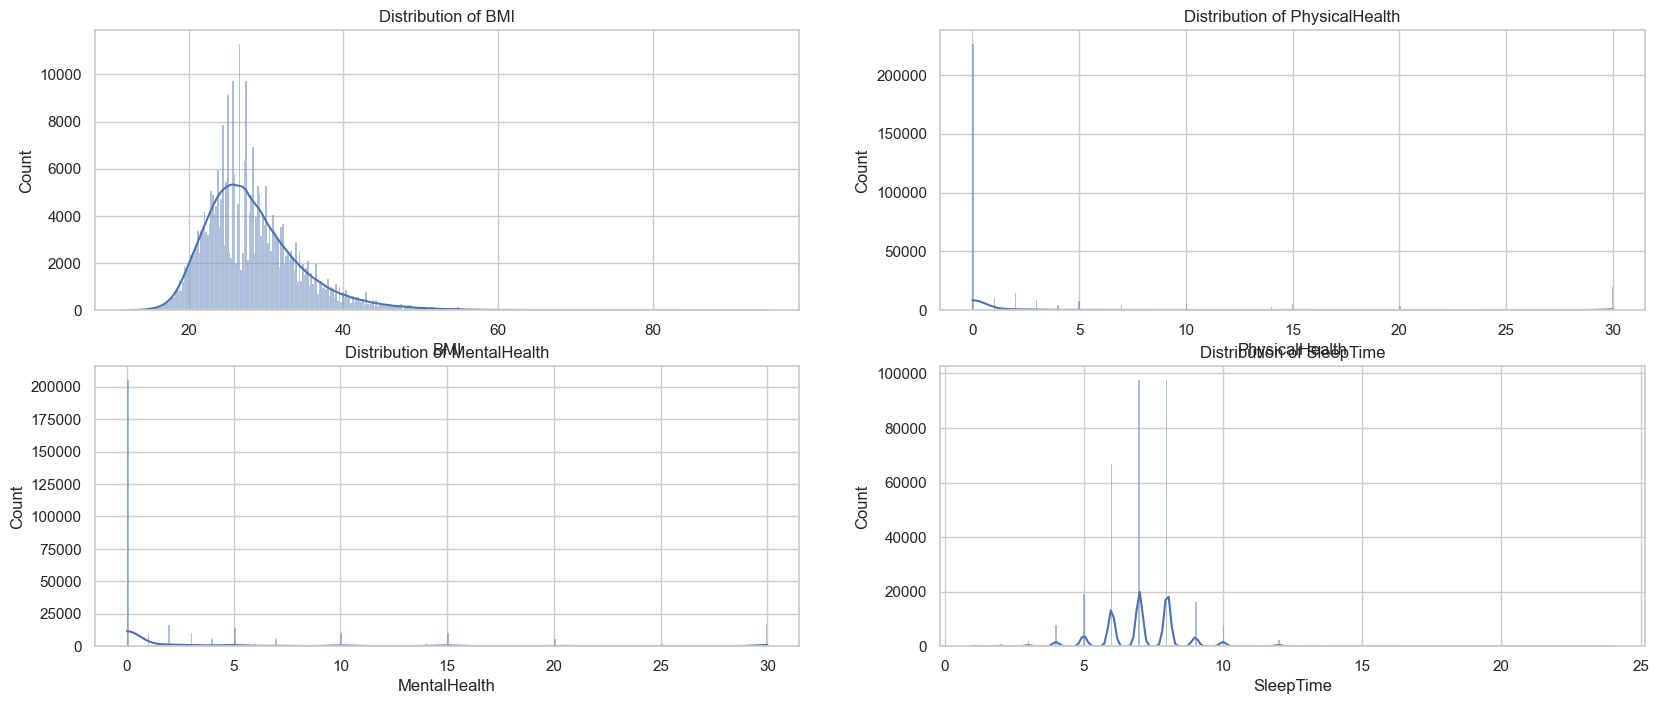

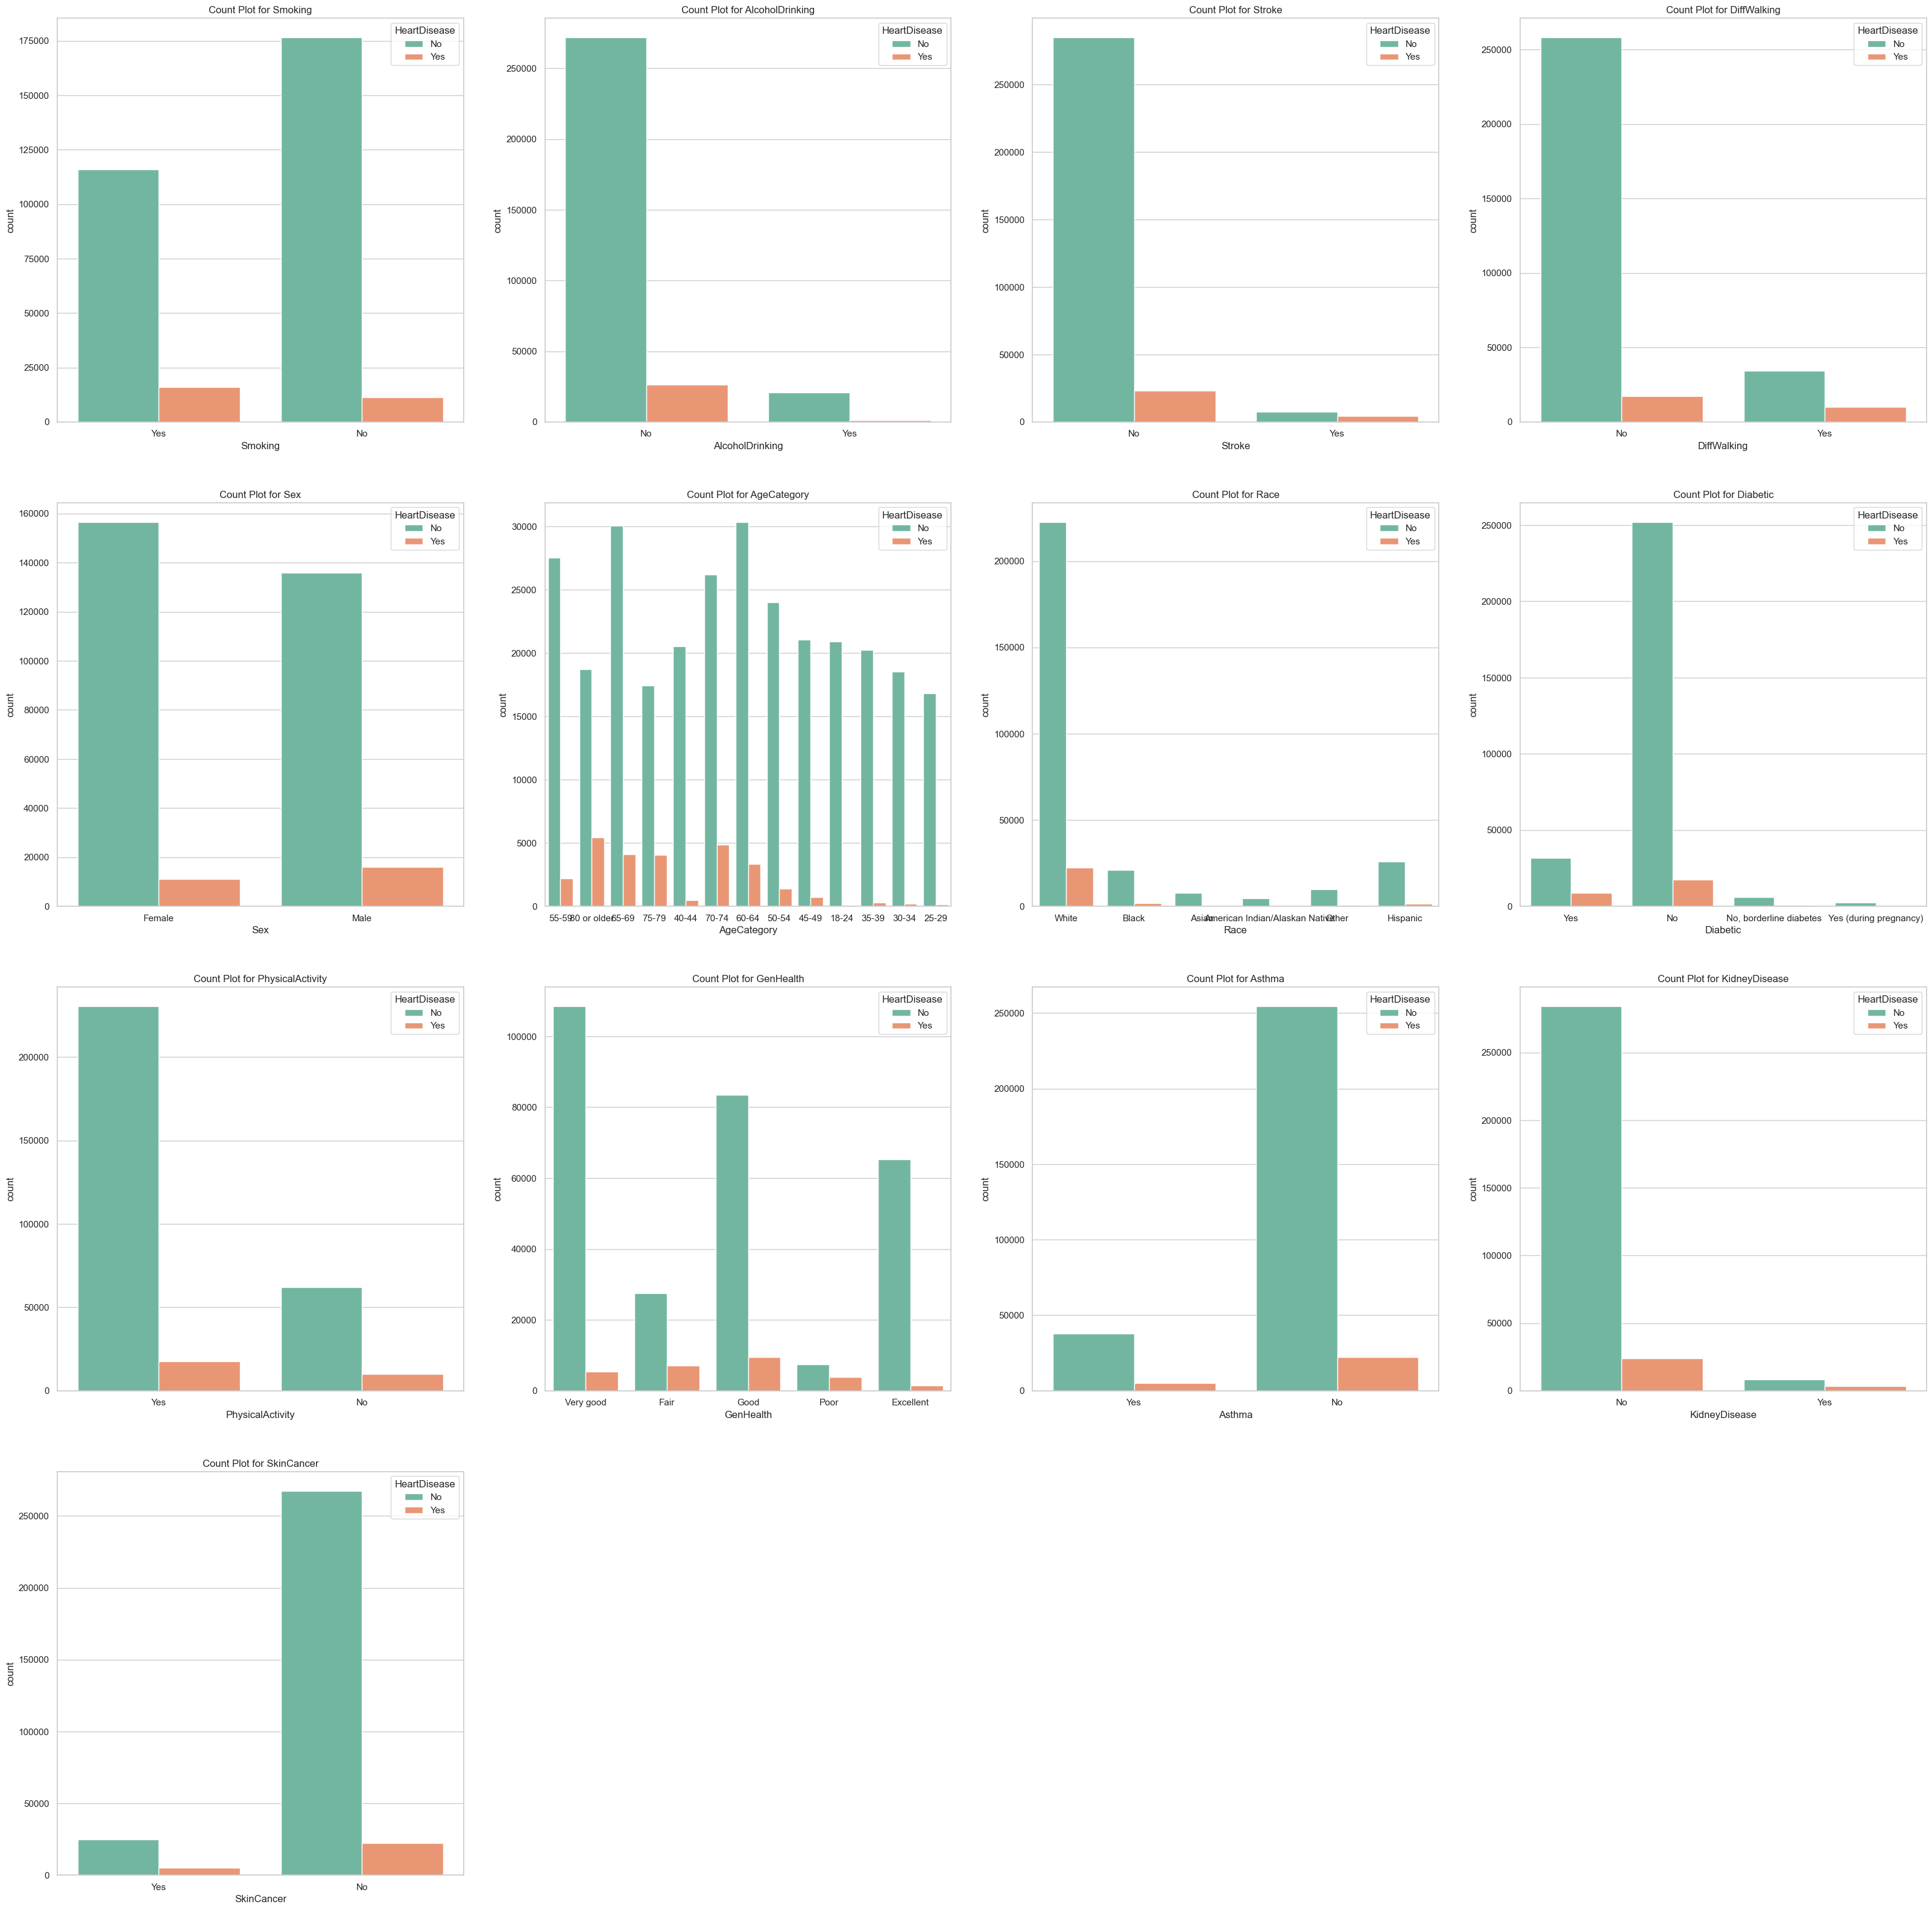

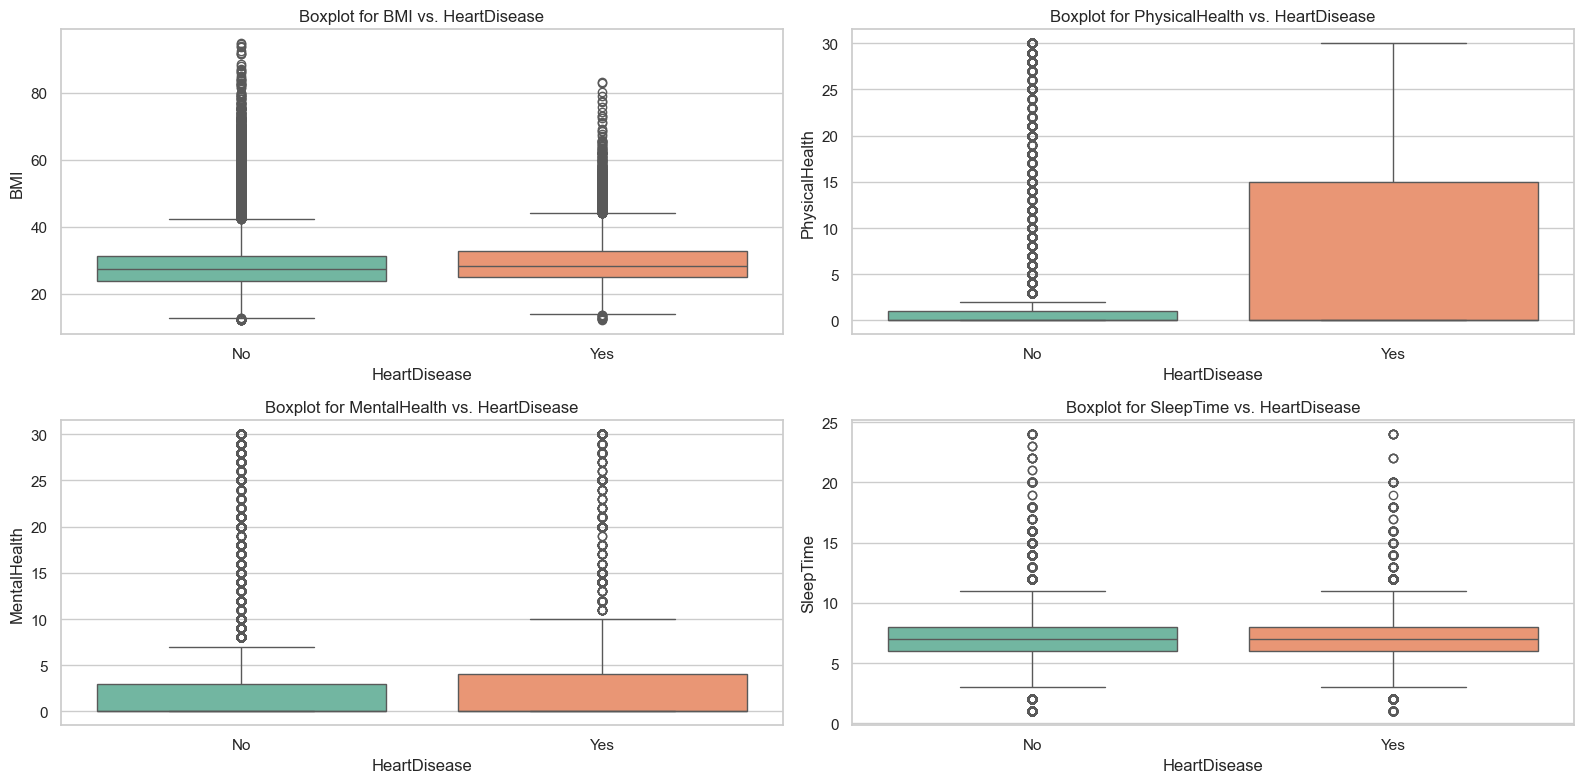

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn
sns.set(style="whitegrid")

# Numerical Features
numerical_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

# Categorical Features
categorical_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 
                         'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 
                         'KidneyDisease', 'SkinCancer']

# Relationship with Target Variable (HeartDisease)
target_variable = 'HeartDisease'

# Visualizing Numerical Features
plt.figure(figsize=(20, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

# Visualizing Categorical Features
plt.figure(figsize=(40, 40))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=feature, data=data, hue=target_variable, palette="Set2")
    plt.title(f'Count Plot for {feature}')

# Box Plots for Numerical Features vs. HeartDisease
plt.figure(figsize=(16, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=target_variable, y=feature, data=data, palette="Set2")
    plt.title(f'Boxplot for {feature} vs. {target_variable}')

plt.tight_layout()
plt.show()


##### Smoking and Heart Disease:


- The visual analysis reveals a notable association between smoking and the prevalence of heart disease.
- Respondents who have reported smoking ('Yes') show a higher incidence of heart disease compared to non-smokers ('No').

##### Gender Disparity:

- Males exhibit a more significant impact of smoking on heart disease compared to females.
- The data suggests a higher susceptibility of males to heart disease when the response to smoking is positive ('Yes').


##### Age-Related Trends:

- There is a discernible age-related trend in the relationship between smoking and heart disease.
- The impact of smoking on heart disease is more pronounced in individuals aged 45 and above, with a peak in the age group of 80 and above.


##### Considerations for Healthcare:

- Healthcare professionals may benefit from focusing preventive measures on male individuals who smoke, particularly in the age range of 45 to 80+.
- Tailored interventions and awareness campaigns could be targeted towards this demographic to mitigate the risk of heart disease.

C:\Users\mayuo\AppData\Local\Temp\ipykernel_23096\1602742274.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Race', y='Ratio_Yes', data=race_data, palette="Set2")


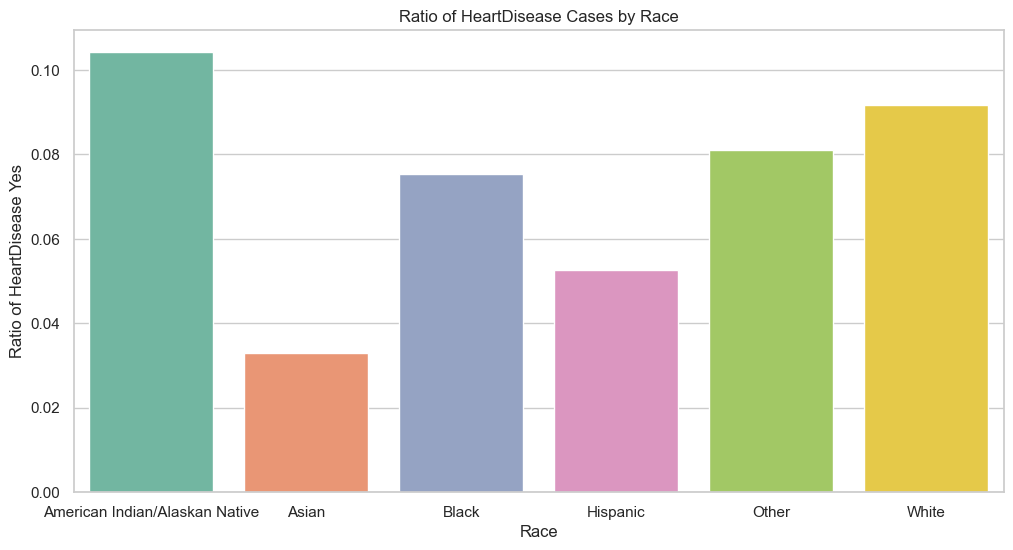

In [15]:
# Assuming 'data' is your DataFrame
race_data = data.groupby(['Race', 'HeartDisease']).size().unstack().reset_index()
race_data.columns.name = None  # To remove the 'HeartDisease' index name

# Calculate the ratio of 'Yes' cases for each race category
race_data['Ratio_Yes'] = race_data['Yes'] / (race_data['Yes'] + race_data['No'])

# Set the style for seaborn
sns.set(style="whitegrid")

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Race', y='Ratio_Yes', data=race_data, palette="Set2")
plt.title('Ratio of HeartDisease Cases by Race')
plt.xlabel('Race')
plt.ylabel('Ratio of HeartDisease Yes')
plt.show()

# Analysis of Heart Disease Across Race Categories

- **Racial Disparities in Heart Disease:**
  - Examination of heart disease prevalence across different race categories reveals distinct disparities.

- **Lowest Ratio in Asians:**
  - Asians exhibit the lowest ratio of individuals with heart disease.
  - This suggests that, proportionally, fewer individuals in the Asian category report cases of heart disease.

- **High Ratios in Whites, Blacks, and American Indians:**
  - Whites, Blacks, and American Indians demonstrate higher ratios of individuals with heart disease.
  - These racial groups exhibit a relatively higher prevalence of heart disease cases compared to other categories.

- **Implications for Healthcare Strategies:**
  - Healthcare strategies aimed at preventing and managing heart disease may need to consider targeted interventions for racial groups with higher ratios, including Whites, Blacks, and American Indians.

- **Further Investigation:**
  - Future investigations could delve into the underlying factors contributing to these racial disparities, considering lifestyle, socio-economic status, and genetic predispositions.

## Potential Considerations for Action:

- **Tailored Health Initiatives:**
  - Tailoring health initiatives to address specific risk factors within each racial category may contribute to more effective preventive measures.

- **Public Awareness Campaigns:**
  - Public awareness campaigns focusing on heart health may benefit from emphasizing risk factors within communities with higher prevalence, fostering early detection and intervention.

- **Collaborative Healthcare Approaches:**
  - Collaborative efforts among healthcare professionals, community leaders, and policymakers can help formulate targeted strategies to reduce the burden of heart disease in high-risk racial groups.


## Feature Engineering.

In [16]:
# BMI needs to be categorised, according to CDC

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25.0:
        return 'Healthy Weight'
    elif 25.0 <= bmi < 30.0:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create the new 'Weight Status' feature
data_clean['BMI'] = data_clean['BMI'].apply(categorize_bmi)

C:\Users\mayuo\AppData\Local\Temp\ipykernel_23096\1274808031.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['BMI'] = data_clean['BMI'].apply(categorize_bmi)


In [17]:
data_clean.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,Underweight,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,Healthy Weight,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,Overweight,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,Healthy Weight,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,Healthy Weight,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [18]:
def uniq_values_object_col(dataset):
    """
    Returns unique values for columns with dtype as object in a DataFrame.

    Parameters:
    - dataset (pd.DataFrame): The DataFrame for which unique values should be retrieved.

    Returns:
    - dict: A dictionary where keys are column names, and values are sets of unique values.
    """
    if not isinstance(dataset, pd.DataFrame):
        raise ValueError("Input 'dataset' must be a pandas DataFrame.")

    unique_values_dict = {}

    # Loop through columns
    for column in dataset.columns:
        if dataset[column].dtype == 'object':
            unique_values_dict[column] = set(dataset[column].unique())

    return unique_values_dict

uniq_values_object_col(data_clean)

{'HeartDisease': {'No', 'Yes'},
 'BMI': {'Healthy Weight', 'Obesity', 'Overweight', 'Underweight'},
 'Smoking': {'No', 'Yes'},
 'AlcoholDrinking': {'No', 'Yes'},
 'Stroke': {'No', 'Yes'},
 'DiffWalking': {'No', 'Yes'},
 'Sex': {'Female', 'Male'},
 'AgeCategory': {'18-24',
  '25-29',
  '30-34',
  '35-39',
  '40-44',
  '45-49',
  '50-54',
  '55-59',
  '60-64',
  '65-69',
  '70-74',
  '75-79',
  '80 or older'},
 'Race': {'American Indian/Alaskan Native',
  'Asian',
  'Black',
  'Hispanic',
  'Other',
  'White'},
 'Diabetic': {'No',
  'No, borderline diabetes',
  'Yes',
  'Yes (during pregnancy)'},
 'PhysicalActivity': {'No', 'Yes'},
 'GenHealth': {'Excellent', 'Fair', 'Good', 'Poor', 'Very good'},
 'Asthma': {'No', 'Yes'},
 'KidneyDisease': {'No', 'Yes'},
 'SkinCancer': {'No', 'Yes'}}

In [19]:
replacement_dict = {
    'Yes': 1,
    'No': 0
}

# Exclude 'Diabetic' from the replacement dictionary
columns_to_exclude_diabetic = ['Diabetic']
replacement_dict_diabetic = {}

# Replace 'Yes' with 1 and 'No' with 0 for columns excluding 'Diabetic'
for column in data_clean.columns:
    if column not in columns_to_exclude_diabetic:
        replacement_dict_diabetic[column] = replacement_dict

# Add 'Diabetic' to the replacement dictionary without any changes
replacement_dict_diabetic['Diabetic'] = {}

# Apply the replacements
ft_data = data_clean.replace(replacement_dict_diabetic)


In [20]:
ft_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,Underweight,1,0,0,3.0,30.0,0,Female,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,Healthy Weight,0,0,1,0.0,0.0,0,Female,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,Overweight,1,0,0,20.0,30.0,0,Male,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,Healthy Weight,0,0,0,0.0,0.0,0,Female,75-79,White,No,0,Good,6.0,0,0,1
4,0,Healthy Weight,0,0,0,28.0,0.0,1,Female,40-44,White,No,1,Very good,8.0,0,0,0


In [21]:
ft_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315252 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      315252 non-null  int64  
 1   BMI               315252 non-null  object 
 2   Smoking           315252 non-null  int64  
 3   AlcoholDrinking   315252 non-null  int64  
 4   Stroke            315252 non-null  int64  
 5   PhysicalHealth    315252 non-null  float64
 6   MentalHealth      315252 non-null  float64
 7   DiffWalking       315252 non-null  int64  
 8   Sex               315252 non-null  object 
 9   AgeCategory       315252 non-null  object 
 10  Race              315252 non-null  object 
 11  Diabetic          315252 non-null  object 
 12  PhysicalActivity  315252 non-null  int64  
 13  GenHealth         315252 non-null  object 
 14  SleepTime         315252 non-null  float64
 15  Asthma            315252 non-null  int64  
 16  KidneyDisease     315252 

In [22]:
ft_data = ft_data.replace({
    'Female': 0,
    'Male': 1
})

In [23]:
ft_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,Underweight,1,0,0,3.0,30.0,0,0,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,Healthy Weight,0,0,1,0.0,0.0,0,0,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,Overweight,1,0,0,20.0,30.0,0,1,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,Healthy Weight,0,0,0,0.0,0.0,0,0,75-79,White,No,0,Good,6.0,0,0,1
4,0,Healthy Weight,0,0,0,28.0,0.0,1,0,40-44,White,No,1,Very good,8.0,0,0,0


In [24]:
ft_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315252 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      315252 non-null  int64  
 1   BMI               315252 non-null  object 
 2   Smoking           315252 non-null  int64  
 3   AlcoholDrinking   315252 non-null  int64  
 4   Stroke            315252 non-null  int64  
 5   PhysicalHealth    315252 non-null  float64
 6   MentalHealth      315252 non-null  float64
 7   DiffWalking       315252 non-null  int64  
 8   Sex               315252 non-null  int64  
 9   AgeCategory       315252 non-null  object 
 10  Race              315252 non-null  object 
 11  Diabetic          315252 non-null  object 
 12  PhysicalActivity  315252 non-null  int64  
 13  GenHealth         315252 non-null  object 
 14  SleepTime         315252 non-null  float64
 15  Asthma            315252 non-null  int64  
 16  KidneyDisease     315252 

In [27]:
ft_data = ft_data.replace({
    '18-24':0,
    '25-29':1,
    '30-34':2,
    '35-39':3,
    '40-44':4,
    '45-49':5,
    '50-54':6,
    '55-59':7,
    '60-64':8,
    '65-69':9,
    '70-74':10,
    '75-79':11,
    '80 or older':12
})

ft_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,3,1,0,0,3.0,30.0,0,0,7,White,1,1,4,5.0,1,0,1
1,0,0,0,0,1,0.0,0.0,0,0,12,White,0,1,4,7.0,0,0,0
2,0,2,1,0,0,20.0,30.0,0,1,9,White,1,1,1,8.0,1,0,0
3,0,0,0,0,0,0.0,0.0,0,0,11,White,0,0,2,6.0,0,0,1
4,0,0,0,0,0,28.0,0.0,1,0,4,White,0,1,4,8.0,0,0,0


In [26]:
ft_data = ft_data.replace({
    'Healthy Weight':0, 
    'Obesity':1, 
    'Overweight':2, 
    'Underweight':3,
    'No': 0,
    'No, borderline diabetes':2,
    'Yes':1,
    'Yes (during pregnancy)':3,
    'Excellent':0, 
    'Fair':1, 
    'Good':2, 
    'Poor':3, 
    'Very good':4
})

ft_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,3,1,0,0,3.0,30.0,0,0,7,White,1,1,4,5.0,1,0,1
1,0,0,0,0,1,0.0,0.0,0,0,12,White,0,1,4,7.0,0,0,0
2,0,2,1,0,0,20.0,30.0,0,1,9,White,1,1,1,8.0,1,0,0
3,0,0,0,0,0,0.0,0.0,0,0,11,White,0,0,2,6.0,0,0,1
4,0,0,0,0,0,28.0,0.0,1,0,4,White,0,1,4,8.0,0,0,0


In [28]:
ft_data = ft_data.replace({
    'Asian':0, 
    'Hispanic':1, 
    'Black':2, 
    'Other':3,
    'White': 4,
    'American Indian/Alaskan Native':5,
    
})

In [29]:
ft_data_encoded = ft_data

In [30]:
ft_data_encoded.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,3,1,0,0,3.0,30.0,0,0,7,4,1,1,4,5.0,1,0,1
1,0,0,0,0,1,0.0,0.0,0,0,12,4,0,1,4,7.0,0,0,0
2,0,2,1,0,0,20.0,30.0,0,1,9,4,1,1,1,8.0,1,0,0
3,0,0,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1
4,0,0,0,0,0,28.0,0.0,1,0,4,4,0,1,4,8.0,0,0,0


In [61]:
ft_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 315252 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      315252 non-null  int64  
 1   BMI               315252 non-null  int64  
 2   Smoking           315252 non-null  int64  
 3   AlcoholDrinking   315252 non-null  int64  
 4   Stroke            315252 non-null  int64  
 5   PhysicalHealth    315252 non-null  float64
 6   MentalHealth      315252 non-null  float64
 7   DiffWalking       315252 non-null  int64  
 8   Sex               315252 non-null  int64  
 9   AgeCategory       315252 non-null  int64  
 10  Race              315252 non-null  int64  
 11  Diabetic          315252 non-null  int64  
 12  PhysicalActivity  315252 non-null  int64  
 13  GenHealth         315252 non-null  int64  
 14  SleepTime         315252 non-null  float64
 15  Asthma            315252 non-null  int64  
 16  KidneyDisease     315252 

### Feature scaling and spliting data

In [31]:
X = ft_data_encoded.drop('HeartDisease', axis=1)  # Features
y = ft_data_encoded['HeartDisease']  # Target variable

In [32]:
X.shape, y.shape

((315252, 17), (315252,))

In [33]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,3,1,0,0,3.0,30.0,0,0,7,4,1,1,4,5.0,1,0,1
1,0,0,0,1,0.0,0.0,0,0,12,4,0,1,4,7.0,0,0,0
2,2,1,0,0,20.0,30.0,0,1,9,4,1,1,1,8.0,1,0,0
3,0,0,0,0,0.0,0.0,0,0,11,4,0,0,2,6.0,0,0,1
4,0,0,0,0,28.0,0.0,1,0,4,4,0,1,4,8.0,0,0,0


In [34]:
# Feature scaling:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,2.256463,1.196738,-0.270532,-0.195400,-0.037361,3.319141,-0.395850,-0.951936,0.139476,0.464102,1.628580,0.533846,1.155977,-1.663746,2.549706,-0.193608,3.118325
1,-1.280127,-0.835605,-0.270532,5.117711,-0.419698,-0.487559,-0.395850,-0.951936,1.542760,0.464102,-0.387889,0.533846,1.155977,-0.047239,-0.392202,-0.193608,-0.320685
2,1.077600,1.196738,-0.270532,-0.195400,2.129216,3.319141,-0.395850,1.050491,0.700790,0.464102,1.628580,0.533846,-0.795044,0.761015,2.549706,-0.193608,-0.320685
3,-1.280127,-0.835605,-0.270532,-0.195400,-0.419698,-0.487559,-0.395850,-0.951936,1.262103,0.464102,-0.387889,-1.873201,-0.144704,-0.855493,-0.392202,-0.193608,3.118325
4,-1.280127,-0.835605,-0.270532,-0.195400,3.148782,-0.487559,2.526211,-0.951936,-0.702494,0.464102,-0.387889,0.533846,1.155977,0.761015,-0.392202,-0.193608,-0.320685


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [36]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X_train,y_train)   
xr_train,xr_dev,yr_train,yr_dev=train_test_split(X_resampled, y_resampled,test_size=0.2)

X_train.shape, y_train.shape, X_resampled.shape, y_resampled.shape

((252201, 17), (252201,), (361378, 17), (361378,))

## Modelling

###### So I am going to try multiple models at the same time then pick the champion model, then fine tune the model.core

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [38]:
from sklearn.metrics import classification_report
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(xr_train, yr_train)
    
    # Make predictions on the test set
    predictions = model.predict(xr_dev)
    
    # Print the classification report
    report = classification_report(yr_dev, predictions)
    print(f"{model_name} Classification Report:\n{report}\n")

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     35889
           1       0.84      0.83      0.83     36387

    accuracy                           0.83     72276
   macro avg       0.83      0.83      0.83     72276
weighted avg       0.83      0.83      0.83     72276


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     35889
           1       0.98      0.98      0.98     36387

    accuracy                           0.98     72276
   macro avg       0.98      0.98      0.98     72276
weighted avg       0.98      0.98      0.98     72276


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     35889
           1       0.96      0.96      0.96     36387

    accuracy                           0.96     72276
   macro 

In [39]:
# Print the hyperparameters for each model
for model_name, model in models.items():
    print(f"Hyperparameters for {model_name}:")
    print(model.get_params())
    print("\n" + "="*50 + "\n")  # Separate the outputs for better readability

Hyperparameters for Logistic Regression:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Hyperparameters for Random Forest:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


Hyperparameters for Decision Tree:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight

###### This amazing we are getting very good results for train & dev with Random Forest been the best 

### Fine tunning the hyperparameters

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None,1,2,5],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [1, 2]
}

# Step 2: Instantiate Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, 
                           param_grid=param_grid, 
                           scoring='accuracy', 
                           cv=5)

# Step 4: Fit GridSearchCV on Training Data
grid_search.fit(xr_train, yr_train)

# Step 5: Evaluate the Best Model
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(xr_dev)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Print classification report for the best model
report = classification_report(yr_dev, best_rf_predictions)
print("Best Model Classification Report:\n", report)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     35855
           1       0.98      0.98      0.98     36416

    accuracy                           0.98     72271
   macro avg       0.98      0.98      0.98     72271
weighted avg       0.98      0.98      0.98     72271



C:\Users\mayuo\AppData\Local\Temp\ipykernel_4832\3076337005.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')


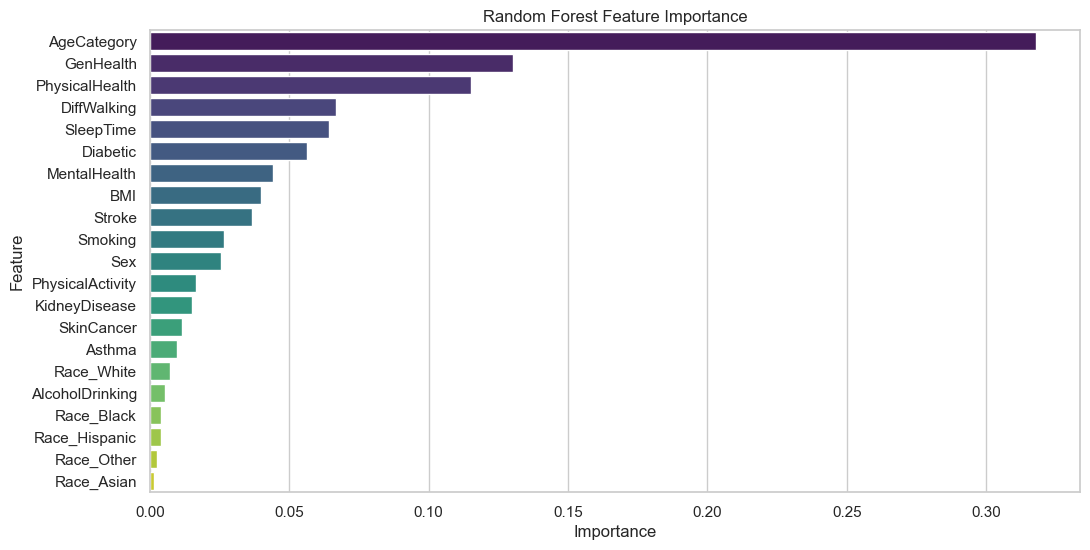

In [41]:
# feature importance
# Get feature importance from the trained Random Forest model
feature_importance_rf = best_rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df_rf = pd.DataFrame({
    'Feature': xr_train.columns,
    'Importance': feature_importance_rf
})

# Sort the DataFrame by importance score in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)


# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

#### Using ANN 

In [37]:
def plot_training_history(model, X_train, y_train, X_test, y_test):
    """
    Train the model and plot training and validation loss, training and validation accuracy.

    Parameters:
    - model: The Keras model to be trained.
    - X_train, y_train: Training data.
    - X_test, y_test: Testing data.

    Returns:
    - last_epoch_results: Dictionary containing the last epoch's loss and accuracy for training and validation.
    """

    # Get the number of epochs as user input
    epochs = int(input("Enter the number of epochs: "))

    history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test),verbose=0)

    # Plot training loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Adjust layout for better visualization
    plt.tight_layout()

    # Show the plots
    plt.show()

    # Extract last epoch results
    last_epoch_results = {
        'last_epoch_train_loss': history.history['loss'][-1],
        'last_epoch_val_loss': history.history['val_loss'][-1],
        'last_epoch_train_accuracy': history.history['accuracy'][-1],
        'last_epoch_val_accuracy': history.history['val_accuracy'][-1],
    }

    # Print last epoch metrics
    print("\nLast Epoch Metrics:")
    print(f"Train Loss: {last_epoch_results['last_epoch_train_loss']:.4f}")
    print(f"Validation Loss: {last_epoch_results['last_epoch_val_loss']:.4f}")
    print(f"Train Accuracy: {last_epoch_results['last_epoch_train_accuracy']:.4f}")
    print(f"Validation Accuracy: {last_epoch_results['last_epoch_val_accuracy']:.4f}")

    return last_epoch_results, model.summary()

def evaluate_model_performance(model, X_train, y_train, X_test, y_test, threshold=0.5):
    # Predictions on the training set
    y_train_pred_probs = model.predict(X_train)
    y_train_pred = (y_train_pred_probs > threshold).astype(int)

    # Evaluate the performance on the training set
    accuracy_train = accuracy_score(y_train, y_train_pred)
    classification_report_train = classification_report(y_train, y_train_pred)
    confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

    print(f'Training Accuracy: {accuracy_train:.2f}')
    print('Classification Report for Training Set:')
    print(classification_report_train)
    print('Confusion Matrix for Training Set:')
    print(confusion_matrix_train)

    # Predictions on the test set
    y_test_pred_probs = model.predict(X_test)
    y_test_pred = (y_test_pred_probs > threshold).astype(int)

    # Evaluate the performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    classification_report_test = classification_report(y_test, y_test_pred)
    confusion_matrix_test = confusion_matrix(y_test, y_test_pred)

    print(f'Test Accuracy: {accuracy_test:.2f}')
    print('Classification Report for Test Set:')
    print(classification_report_test)
    print('Confusion Matrix for Test Set:')
    print(confusion_matrix_test)

xr_train,xr_dev,yr_train,yr_dev

Enter the number of epochs:  100


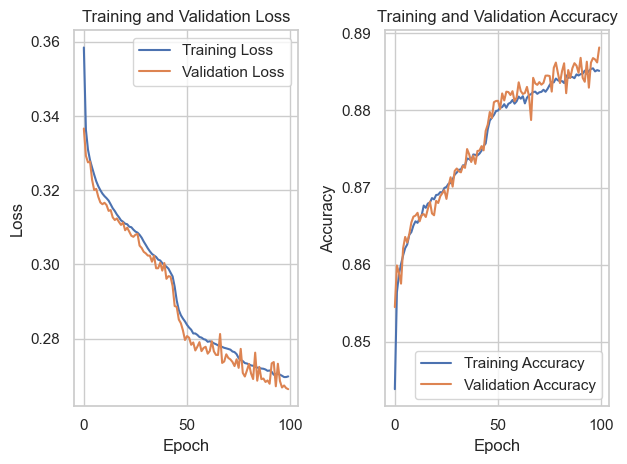


Last Epoch Metrics:
Train Loss: 0.2698
Validation Loss: 0.2664
Train Accuracy: 0.8851
Validation Accuracy: 0.8882
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 5)                 110       
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 578
Trainable params: 578
Non-trainable params: 0
_________________________________________________________________
Training Accuracy: 0.89
Classification Report for Training Set:
              precision    recall  f1-score   support

           0       0.88      0.89      0.89    143119
           1       0.89      0.88 

In [43]:
ann_1 = keras.Sequential([
    keras.layers.Dense(units=xr_train.shape[1], activation='relu', input_dim=xr_train.shape[1]),
    keras.layers.Dense(units=5, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

ann_1.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

plot_training_history(ann_1,xr_train, yr_train, xr_dev, yr_dev)
evaluate_model_performance(ann_1,xr_train, yr_train, xr_dev, yr_dev)

Enter the number of epochs:  100


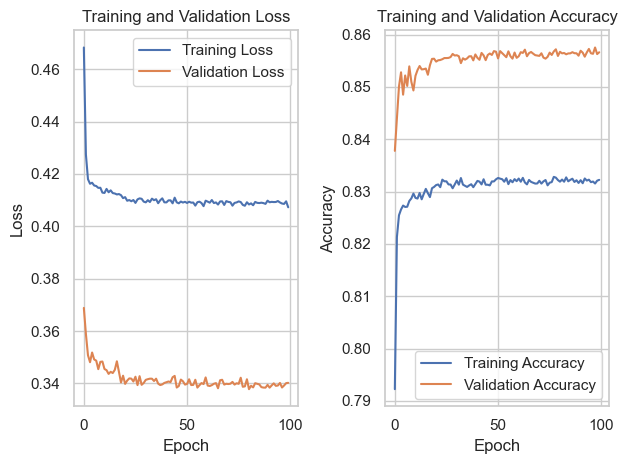


Last Epoch Metrics:
Train Loss: 0.4073
Validation Loss: 0.3402
Train Accuracy: 0.8322
Validation Accuracy: 0.8566
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                242       
                                                                 
 batch_normalization_2 (Batc  (None, 11)               44        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 11)                0         
                                                                 
 dense_4 (Dense)             (None, 6)                 72        
                                                                 
 batch_normalization_3 (Batc  (None, 6)                24        
 hNormalization)                                                 
     

In [38]:
# Using regularization and a bigger architecture
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
ann_2 = Sequential()
ann_2.add(Dense(11, activation='relu', input_dim=xr_train.shape[1]))
ann_2.add(BatchNormalization())
ann_2.add(Dropout(0.5))
ann_2.add(Dense(6, activation='relu'))
ann_2.add(BatchNormalization())
ann_2.add(Dropout(0.5))
ann_2.add(Dense(1, activation='sigmoid'))


opt = keras.optimizers.Adam(learning_rate=0.001)
ann_2.compile(optimizer= opt, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

plot_training_history(ann_2,xr_train, yr_train, xr_dev, yr_dev)
evaluate_model_performance(ann_2,xr_train, yr_train, xr_dev, yr_dev)

##### This took about 1 hour to run on my GPU I would say I can retrain and make a different architecture for better result but for now we would be going with the RandomForest and XGBoost. Next I would be testing their performance with the test set. 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [41]:
from sklearn.metrics import classification_report
models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(xr_train, yr_train)
    
    # Make predictions on the test set
    predictions = model.predict(xr_dev)
    
    # Print the classification report
    report = classification_report(yr_dev, predictions)
    print(f"{model_name} Classification Report:\n{report}\n")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     35889
           1       0.98      0.98      0.98     36387

    accuracy                           0.98     72276
   macro avg       0.98      0.98      0.98     72276
weighted avg       0.98      0.98      0.98     72276


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     35889
           1       0.98      0.95      0.97     36387

    accuracy                           0.97     72276
   macro avg       0.97      0.97      0.97     72276
weighted avg       0.97      0.97      0.97     72276




In [42]:
predictions_test_rf = models['Random Forest'].predict(X_test)
report_test_rf = classification_report(y_test, predictions_test_rf)
print(report_test_rf)

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     57731
           1       0.30      0.48      0.37      5320

    accuracy                           0.86     63051
   macro avg       0.62      0.69      0.65     63051
weighted avg       0.89      0.86      0.88     63051



In [43]:
predictions_test_XG = models['XGBoost'].predict(X_test)
report_test_XG = classification_report(y_test, predictions_test_XG)
print(report_test_XG)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     57731
           1       0.35      0.41      0.38      5320

    accuracy                           0.89     63051
   macro avg       0.65      0.67      0.66     63051
weighted avg       0.89      0.89      0.89     63051



### The best model would be the XG but I want to further try something. 
- Since there is also an imbalance of data in the test I am going to down sample for the majority class and see how both modesl perform

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [44]:
y_test.value_counts()

HeartDisease
0    57731
1     5320
Name: count, dtype: int64

In [45]:
y_test.isnull().sum()

0

In [48]:
num_minority_samples = y_test.value_counts()[1]

under_sampler = RandomUnderSampler(sampling_strategy={0: num_minority_samples}, random_state=42)

# Downsample majority class
X_downsampled_test, y_downsampled_test = under_sampler.fit_resample(X_test, y_test)

In [47]:
from imblearn.under_sampling import RandomUnderSampler
num_minority_samples = y_test[]

under_sampler = RandomUnderSampler(sampling_strategy={0: num_minority_samples}, random_state=42)

# Downsample majority class
X_downsampled_test, y_downsampled_test = under_sampler.fit_resample(X_test, y_test)

NameError: name 'num_minority_samples' is not defined

In [49]:
y_downsampled_test.value_counts()

HeartDisease
0    5320
1    5320
Name: count, dtype: int64

In [50]:
y_downsampled_test.isnull().sum()

0

In [51]:
X_downsampled_test.isnull().sum()

BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [52]:
predictions_test_rf = models['Random Forest'].predict(X_downsampled_test)
report_test_rf = classification_report(y_downsampled_test, predictions_test_rf)
print(report_test_rf)

              precision    recall  f1-score   support

           0       0.63      0.89      0.74      5320
           1       0.81      0.48      0.60      5320

    accuracy                           0.69     10640
   macro avg       0.72      0.69      0.67     10640
weighted avg       0.72      0.69      0.67     10640



In [53]:
predictions_test_XG = models['XGBoost'].predict(X_downsampled_test)
report_test_XG = classification_report(y_downsampled_test, predictions_test_XG)
print(report_test_XG)

              precision    recall  f1-score   support

           0       0.61      0.92      0.73      5320
           1       0.84      0.41      0.55      5320

    accuracy                           0.67     10640
   macro avg       0.73      0.67      0.64     10640
weighted avg       0.73      0.67      0.64     10640



In [54]:
from sklearn.metrics import roc_curve, auc

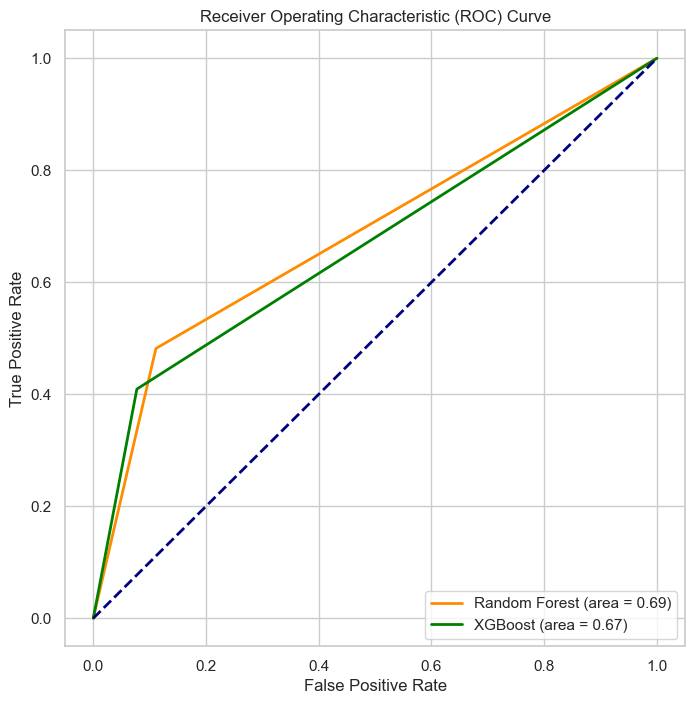

In [55]:

# Assuming predictions and true labels are available for both models
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_downsampled_test, predictions_test_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_downsampled_test, predictions_test_XG)
roc_auc_xg = auc(fpr_xg, tpr_xg)

# Plotting both ROC curves on the same figure
plt.figure(figsize=(8, 8))

# Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='Random Forest (area = {:.2f})'.format(roc_auc_rf))

# XGBoost ROC curve
plt.plot(fpr_xg, tpr_xg, color='green', lw=2, label='XGBoost (area = {:.2f})'.format(roc_auc_xg))

# Diagonal reference line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Adding labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Display the plot
plt.show()

C:\Users\mayuo\AppData\Local\Temp\ipykernel_23096\3175565107.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')


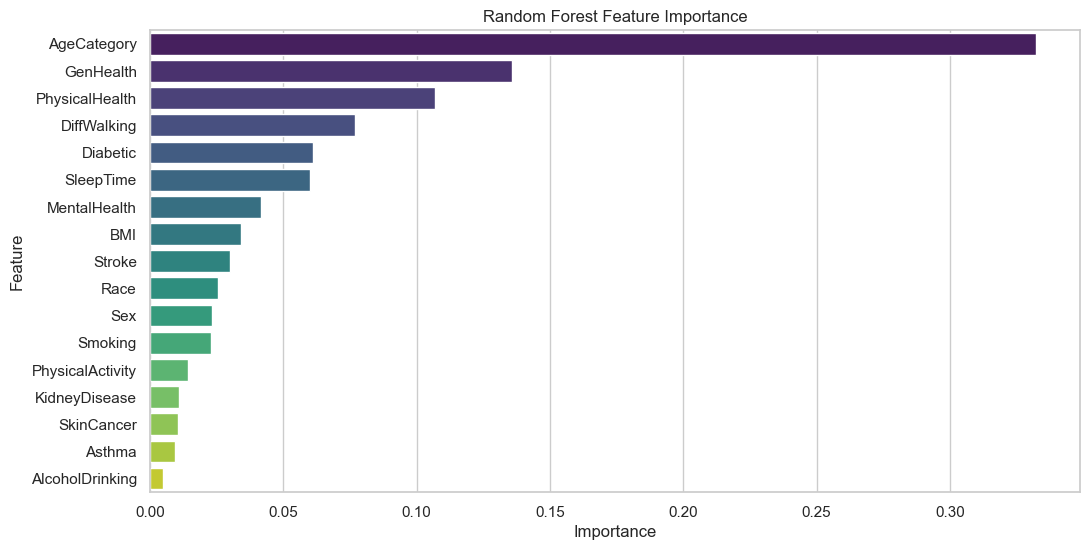

In [58]:
# Get feature importance from the trained Random Forest model
feature_importance_rf = models['Random Forest'].feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df_rf = pd.DataFrame({
    'Feature': xr_train.columns,
    'Importance': feature_importance_rf
})

# Sort the DataFrame by importance score in descending order
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)


# Plot the feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()

### Decision and Saving the model
###### I would be going with the model with the higher F1_score which is RandomForest.

In [56]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as model_file:
    pickle.dump(models['Random Forest'], model_file)

In [57]:
import joblib

# Assuming 'best_model' is your trained and scaled model
joblib.dump(models['Random Forest'], 'model.joblib')

['model.joblib']

In [59]:
X_test.head(4)

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
226062,1.077600,-0.835605,-0.270532,-0.1954,3.403674,-0.487559,-0.395850,-0.951936,-1.544464,0.464102,-0.387889,0.533846,0.505637,-0.047239,2.549706,-0.193608,-0.320685
164309,-0.101264,1.196738,-0.270532,-0.1954,-0.292253,-0.487559,2.526211,1.050491,1.262103,0.464102,-0.387889,-1.873201,-0.795044,-0.047239,2.549706,-0.193608,-0.320685
75823,1.077600,-0.835605,-0.270532,-0.1954,-0.419698,-0.487559,-0.395850,1.050491,0.700790,0.464102,-0.387889,0.533846,1.155977,-0.047239,-0.392202,-0.193608,-0.320685
86119,1.077600,1.196738,-0.270532,-0.1954,-0.419698,-0.487559,-0.395850,1.050491,0.981447,0.464102,-0.387889,-1.873201,-1.445385,0.761015,-0.392202,-0.193608,-0.320685


In [62]:
model = pickle.load(open('model.pkl', 'rb'))

In [63]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)